In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
from scipy import optimize
import scipy
import os
import spectrum_connectivity as sc
import tools
import importlib
importlib.reload(sc)
importlib.reload(tools)
import shutil
import dynamic

In [2]:
datapath = "data/Fig5/"
figpath = "figure/Fig5/"

In [5]:
paras = [[0.1,0,1,0.9],[0.01,0,1,1.5],[0.01,0,1,3],[0.05,0,1,1.5],[0.1,0,1,1.5],[0.2,0,1,1.5],[0.25,0,1,1.5],[0.3,0,1,1.5],[0.4,0,1,1.5],[0.5,0,1,1.5],[0.55,0,1,1.5],[0.6,0,1,1.5],[0.7,0,1,1.5],[0.8,0,1,1.5],[0.9,0,1,1.5],[1.0,0,1,1.5],[0.2,0,1,3],[0.2,0,1,4]]
for para in paras:
    alpha,c,d,gamma=para
    N = 2000
    diluted = 1
    segment=1
    clean_diag=False
    gaussian=False
    if_circulant = True

    tau = 0.01
    phi = lambda x: np.tanh(x)
    if not os.path.exists(datapath+"lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,0)):
        for ii in range(5):
            para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
            mymodel = dynamic.rnn(para)
            state1 = mymodel.pattern[0]
            mymodel.simulate(2,state1,dt=0.01)
            end = mymodel.state[:,-1]
            mymodel.simulate(1,end,dt=0.005)

            aa = dynamic.lyapunov_spectrum(mymodel)
            print(aa[:10])
            np.savetxt(datapath+"lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,ii),aa)
#             shutil.copyfile("../data/connectivity_dynamic/lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,ii),datapath+"lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,ii))


FAKE ALPHA = 0.1
FAKE ALPHA = 0.01
FAKE ALPHA = 0.01
FAKE ALPHA = 0.05
FAKE ALPHA = 0.1
FAKE ALPHA = 0.2
FAKE ALPHA = 0.25
FAKE ALPHA = 0.3
FAKE ALPHA = 0.4
FAKE ALPHA = 0.5
FAKE ALPHA = 0.55
FAKE ALPHA = 0.6
FAKE ALPHA = 0.7
FAKE ALPHA = 0.8
FAKE ALPHA = 0.9
FAKE ALPHA = 1.0
FAKE ALPHA = 0.2
FAKE ALPHA = 0.2


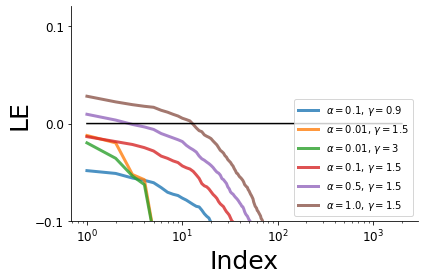

In [7]:
 paras = [[0.01,0,1,1.5],[0.01,0,1,3],[0.05,0,1,1.5],[0.1,0,1,1.5],[0.2,0,1,1.5],[0.25,0,1,1.5],[0.3,0,1,1.5],[0.4,0,1,1.5],[0.5,0,1,1.5],[0.55,0,1,1.5],[0.6,0,1,1.5],[0.7,0,1,1.5],[0.8,0,1,1.5],[0.9,0,1,1.5],[1.0,0,1,1.5],[0.2,0,1,3],[0.2,0,1,4]]
paras = [[0.1,0,1,0.9],[0.01,0,1,1.5],[0.01,0,1,3],[0.1,0,1,1.5],[0.5,0,1,1.5],[1.0,0,1,1.5]]
all_alpha=[]
all_lbdmax=[]
for para in paras:
    alpha,c,d,gamma=para
    if os.path.exists(datapath+"lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,0)):
        all_aa =[]
        lbdmax =[]
        for ii in range(5):
            aa=np.loadtxt(datapath+"lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,ii))
            all_aa.append(aa)
            if gamma==1.5:
                lbdmax.append(np.max(aa))
        if gamma==1.5:
            all_alpha.append(alpha)
            all_lbdmax.append(lbdmax)
        x = np.linspace(1,len(aa),num=len(aa))
        plt.semilogx(x,np.average(np.array(all_aa),axis=0),linewidth=3,label=r"$\alpha=${}, $\gamma=${}".format(alpha,gamma),alpha=0.8)
all_alpha=np.array(all_alpha)
all_lbdmax = np.array(all_lbdmax)
plt.legend(loc="lower right")
plt.plot(x,0*x,color="k")
plt.ylim(-0.1,0.12)
plt.xticks(fontsize=12)
plt.yticks([0.1,0,-0.1],fontsize=12)
plt.xlabel("Index",fontsize=25)
plt.ylabel("LE",fontsize=25)
ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.tight_layout()
plt.savefig(figpath+"lyapunov_exponent_new.pdf")

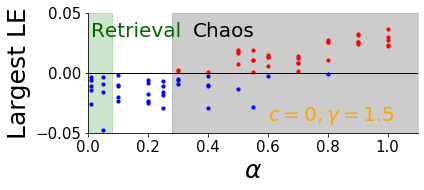

In [7]:
paras = [[0.01,0,1,1.5],[0.01,0,1,3],[0.05,0,1,1.5],[0.1,0,1,1.5],[0.2,0,1,1.5],[0.25,0,1,1.5],[0.3,0,1,1.5],[0.4,0,1,1.5],[0.5,0,1,1.5],[0.55,0,1,1.5],[0.6,0,1,1.5],[0.7,0,1,1.5],[0.8,0,1,1.5],[0.9,0,1,1.5],[1.0,0,1,1.5],[0.2,0,1,3],[0.2,0,1,4]]
all_alpha=[]
all_lbdmax=[]
for para in paras:
    alpha,c,d,gamma=para
    if os.path.exists(datapath+"lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,0)):
        all_aa =[]
        lbdmax =[]
        for ii in range(5):
            aa=np.loadtxt(datapath+"lyaspectrum_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,ii))
            all_aa.append(aa)
            if gamma==1.5:
                lbdmax.append(np.max(aa))
        if gamma==1.5:
            all_alpha.append(alpha)
            all_lbdmax.append(lbdmax)
        x = np.linspace(1,len(aa),num=len(aa))
#         plt.semilogx(x,np.average(np.array(all_aa),axis=0),linewidth=2,label=r"$\alpha=${}, $\gamma=${}".format(alpha,gamma),alpha=0.8)
all_alpha=np.array(all_alpha)
all_lbdmax = np.array(all_lbdmax)
plt.fill_between([0.0,0.08],[0.05,0.05],[-0.05,-0.05],color="g",alpha=0.2)
plt.fill_between([0.28,1.2],[0.05,0.05],[-0.05,-0.05],color="k",alpha=0.2)
# plt.legend()
plt.ylim(-0.05,0.05)
for i,lbd in enumerate(all_lbdmax.T):
    for j in range(len(lbd)):
        if lbd[j]>0:
            plt.scatter(all_alpha[j],lbd[j],color="r",s=10)
        else:
            plt.scatter(all_alpha[j],lbd[j],color="b",s=10)
plt.plot([-10,10],[0,0],color="k",linewidth=1)
plt.xlim(0.0,1.1)
ax = plt.gca()
ax.set_aspect(4)
plt.xticks(fontsize=15)
plt.yticks([0.05,0,-0.05],fontsize=15)
plt.fill
plt.xlabel(r"$\alpha$",fontsize=25)
plt.ylabel("Largest LE",fontsize=25)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.text(s=r"Retrieval",x=0.01,y=0.03,fontsize=20,color="darkgreen")
plt.text(s=r"Chaos",x=0.35,y=0.03,fontsize=20,color="k")
plt.text(s=r"$c=0,\gamma=1.5$",x=0.6,y=-0.04,fontsize=20,color="orange")
plt.tight_layout()
plt.savefig(figpath+"lyapunov_exponent_new2.pdf")

FAKE ALPHA = 0.01
FAKE ALPHA = 0.1
FAKE ALPHA = 1.0


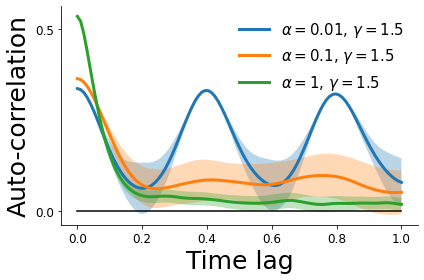

In [6]:
paras=[[0.01,0,1,1.5],[0.1,0,1,1.5],[1,0,1,1.5]]
for para in paras:
    alpha,c,d,gamma=para
    N = 4000
    diluted = 1
    segment=1
    clean_diag=False
    gaussian=False
    print("FAKE ALPHA = "+str(alpha/(diluted)))
    if_circulant = True

    if not os.path.exists(datapath+"autocorrelation_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        tau = 0.01
        phi = lambda x: np.tanh(x)
        all_cor = []
        for i in range(100):
            print(i)
            para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
            mymodel = dynamic.rnn(para)
            state1 = 0.1*np.random.randn(N)
            mymodel.simulate(1,state1,dt=0.01)
            end = mymodel.state[:,-1]
            mymodel.simulate(1,end,dt=0.01)
            acor = mymodel.auto_correlation()
            all_cor.append(acor)
#             plt.plot(mymodel.t,acor)
        np.savetxt(datapath+"autocorrelation_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),np.array(all_cor))
#        shutil.copyfile("../data/connectivity_dynamic/autocorrelation_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),datapath+"autocorrelation_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))


for para in paras:
    alpha,c,d,gamma=para
    aa = np.loadtxt(datapath+"autocorrelation_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    tt = np.linspace(0,1,num=100)
    mean = np.average(aa,axis=0)
    std = np.var(aa,axis=0)
    plt.plot(tt,mean,label=r"$\alpha=${}, $\gamma=${}".format(alpha,gamma),linewidth=3)
    
    plt.fill_between(tt,mean+std,mean-std,alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks([0.0,0.5,1.0],fontsize=12)
plt.xlabel("Time lag",fontsize=25)
plt.ylabel("Auto-correlation",fontsize=25)
plt.legend(fontsize=15,frameon=False)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.plot(tt,0*np.average(aa,axis=0),color="k")
plt.tight_layout()
plt.savefig(figpath+"autocorrelation.pdf")